In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
761,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.00,0,0,SOTON/O2 3101272,7.1250,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.00,0,0,PC 17476,26.2875,E24,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.sample()
# gives a random record

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.275,D36,C


In [6]:
# crosstab

pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [7]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


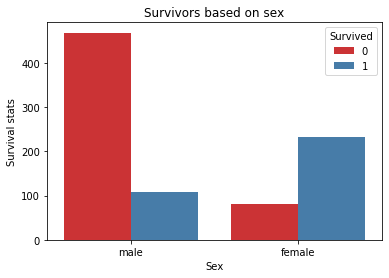

In [8]:
# countplot

ax = sns.countplot(x="Sex", hue="Survived", palette="Set1", data=df)
ax.set(title="Survivors based on sex",xlabel="Sex",ylabel="Survival stats")
plt.show()

C:\Swarali\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Swarali\Anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


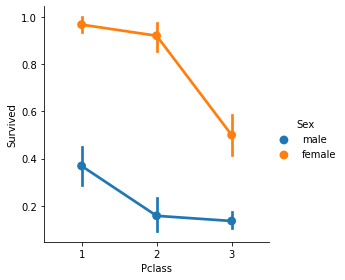

In [9]:
# factorplot

fp = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=df, aspect=1.0, size=4)
plt.show()


**4 C's of data science :**
**Correcting**
**Completing**
**Creating**
**Converting**


In [11]:
# Correcting

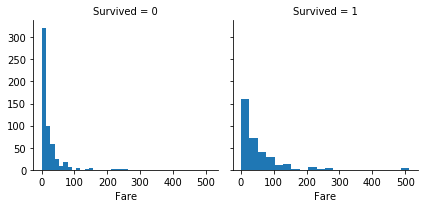

In [10]:
graph_fare = sns.FacetGrid(df, col="Survived")
graph_fare.map(plt.hist, "Fare", bins=20)

In [11]:
df.loc[df["Fare"] > 400, "Fare"] = df["Fare"].median()

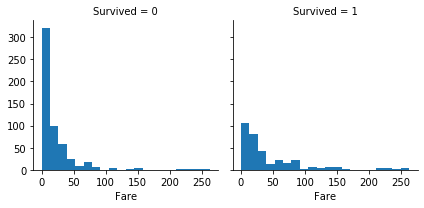

In [12]:
graph_age = sns.FacetGrid(df, col="Survived")
graph_age.map(plt.hist, "Fare", bins=20)

In [13]:
# Completing

In [14]:
for column in df:
    print(column,": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [17]:
# null values in Age, Cabin, Embarked

In [15]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [16]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
df["Embarked"].fillna("S", inplace=True)

In [18]:
del df["Cabin"]

In [19]:
for column in df:
    print(column,": ", df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Embarked :  0


In [20]:
# Creating (feature engineering)

In [21]:
df["Name"].sample(10)

36                            Mamee, Mr. Hanna
57                         Novel, Mr. Mansouer
16                        Rice, Master. Eugene
795                         Otter, Mr. Richard
736    Ford, Mrs. Edward (Margaret Ann Watson)
563                          Simmons, Mr. John
693                           Saad, Mr. Khalil
415    Meek, Mrs. Thomas (Annie Louise Rowley)
361                  del Carlo, Mr. Sebastiano
249              Carter, Rev. Ernest Courtenay
Name: Name, dtype: object

In [22]:
# get title from name

def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
        # on each line split at , take 2nd part split at . take 1st part
    else:
        return "No title found"

titles = set([x for x in df.Name.map(lambda x: get_title(x))])
print(titles)    

{'Master', 'the Countess', 'Ms', 'Don', 'Miss', 'Mrs', 'Capt', 'Major', 'Sir', 'Mme', 'Jonkheer', 'Lady', 'Rev', 'Dr', 'Mr', 'Mlle', 'Col'}


In [23]:
df['Titles'] = df['Name'].map(lambda x : get_title(x))
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,S,Miss
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,S,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,14.4542,C,Mr
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,S,Mr
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,S,Mr


In [24]:
def titles_new(n):
    title = n["Titles"]
    if title in ['Capt','Col','Major']:
        return 'Officer'
    elif title in ['Jonkheer','Don','Dona','the Countess','Lady','Sir']:
        return 'Royalty'
    elif title == "Mme":
        return "Mrs"
    elif title in ['Mlle','Ms']:
        return 'Miss'
    else:
        return title

In [25]:
df['Titles'] = df.apply(titles_new, axis=1)
df.Titles.value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Dr           7
Rev          6
Royalty      5
Officer      5
Name: Titles, dtype: int64

In [26]:
del df["Name"]

In [27]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
166,167,1,1,female,28.0,0,1,113505,55.0000,S,Mrs
706,707,1,2,female,45.0,0,0,223596,13.5000,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr
221,222,0,2,male,27.0,0,0,220367,13.0000,S,Mr
391,392,1,3,male,21.0,0,0,350034,7.7958,S,Mr


In [31]:
# Converting (all data in numbers for ML)


In [28]:
df.Sex.replace(('male','female'), (0,1), inplace=True)
df.Embarked.replace(('C','Q','S'), (0,1,2), inplace=True)
df.Titles.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace=True)

In [29]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titles
520,521,1,1,1,30.00,0,0,12749,93.5000,2,1
674,675,0,2,0,28.00,0,0,239856,0.0000,2,0
644,645,1,3,1,0.75,2,1,2666,19.2583,0,1
616,617,0,3,0,34.00,1,1,347080,14.4000,2,0
142,143,1,3,1,24.00,1,0,STON/O2. 3101279,15.8500,2,2


In [30]:
# correlation

corr = df.corr()
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Titles         0.361340
Fare           0.259289
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
# training the ML model

In [31]:
# train test split
from sklearn.model_selection import train_test_split

df = pd.get_dummies(df)
y = df['Survived']
x = df.drop(['Survived',"PassengerId"], axis=1)
# x is equal to the df after the given cols are dropped ; axis=1 drop the col,not row


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
# shift+tab on train_test_split() for more info

In [32]:
# ML model

import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomf = RandomForestClassifier()
randomf.fit(x_train, y_train)

y_pred = randomf.predict(x_test)

accuracy = round(accuracy_score(y_pred,y_test) *100, 2)
print("Accuracy of model : ",accuracy)

pickle.dump(randomf, open('titanic-ML-model.sav','wb'))

Accuracy of model :  86.67


C:\Swarali\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
# now import the test data

df_test = pd.read_csv('test.csv')
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S
34,926,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C78,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
123,1015,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,NaN,S
361,1253,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C


In [36]:
df_test["Age"].fillna(df_test["Age"].median(), inplace=True)
df_test["Fare"].fillna(df_test["Age"].median(), inplace=True)
df_test["Embarked"].fillna("S", inplace=True)

# for getting titles from names 
df_test['Titles'] = df_test['Name'].map(lambda x : get_title(x))
df_test['Titles'] = df_test.apply(titles_new, axis=1)

# to store ids before deleting that col, for the final result
ids = df_test["PassengerId"]

In [37]:
# 2 ways to remove a col

# 1st
del df_test["Cabin"]
del df_test["PassengerId"]

# 2nd
df_test.drop("Ticket", axis=1,inplace=True)
df_test.drop("Name", axis=1,inplace=True)

In [38]:
# converting everything to numbers

df_test.Sex.replace(('male','female'), (0,1), inplace=True)
df_test.Embarked.replace(('C','Q','S'), (0,1,2), inplace=True)
df_test.Titles.replace(('Mr','Miss','Mrs','Master','Dr','Rev','Officer','Royalty'), (0,1,2,3,4,5,6,7), inplace=True)

In [39]:
df_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
349,2,1,31.0,0,0,21.0000,2,1
23,1,0,21.0,0,1,61.3792,0,0
123,3,0,28.0,0,0,7.2500,2,0
408,3,1,27.0,0,0,7.7208,1,1
321,3,0,25.0,0,0,7.2292,0,0


In [40]:
#  use model on test data

df_test = pd.get_dummies(df_test)
predictions = randomf.predict(df_test)
output = pd.DataFrame({"PassengerId" : ids, "Survived" : predictions})
output.to_csv("titanic_pred.csv", index=False)

ValueError: Number of features of the model must match the input. Model n_features is 689 and input n_features is 8 